## Importing necessary python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving food_rating.csv to food_rating (1).csv


### Reading the data

In [ ]:
data= pd.read_csv("food_rating.csv")

In [ ]:
data.head()

,Emp Id,Pasta,Non-Veg Dish,Brownie,Lentils,Fries,Fruits
0,Emp_1,9,77,79,59,53,100
1,Emp_2,9,62,76,66,54,73
2,Emp_3,9,50,97,77,35,80
3,Emp_4,9,68,77,85,61,66
4,Emp_5,9,98,54,49,80,91


## We can see that we have only numerical variables and emp_id is just a unique identification number of the employee. Lets set it as index

In [ ]:
data.set_index('Emp Id',inplace = True)

### descriptive stats of the dataset

In [ ]:
data.describe()

,Pasta,Non-Veg Dish,Brownie,Lentils,Fries,Fruits
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,18.987952,109.779116,124.518072,106.377510,97.638554,125.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,9.000000,50.000000,52.000000,49.000000,35.000000,66.000000
25%,13.000000,84.000000,89.000000,83.000000,64.000000,97.000000
50%,19.000000,104.000000,119.000000,103.000000,89.000000,124.000000
75%,25.000000,132.000000,153.000000,128.000000,123.000000,148.000000
max,32.000000,203.000000,318.000000,203.000000,218.000000,223.000000


## Visualize the spread of the variables using a boxplot

Text(0.5, 0.98, 'BOXPLOTS TO CHECK THE SPREAD OF VARIABLES')

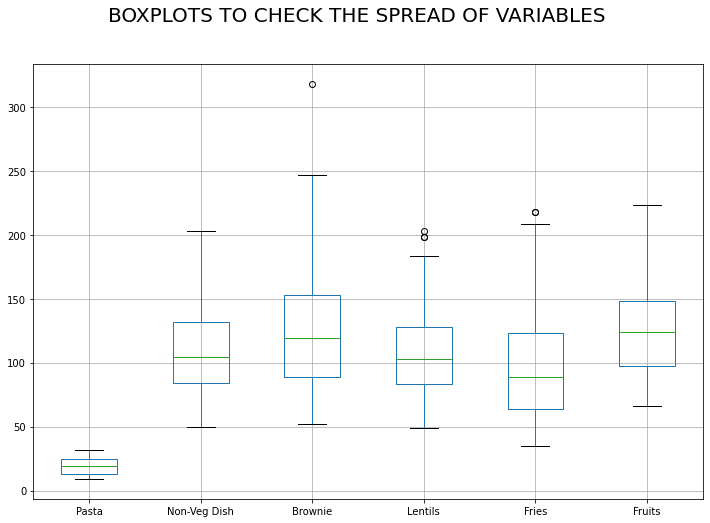

In [ ]:
data.boxplot(figsize = (12,8), grid = True)
plt.suptitle('BOXPLOTS TO CHECK THE SPREAD OF VARIABLES', size = 20)

## Question-1: Do you find any difference in the scale of the variables? Is there an exception? Write your observations from the boxplots.

### It can be seen from the above graph that there is difference in the scale of variables between Pasta and other food items, the scale of Pasta is in double digits whereas the scale of other food items like Non veg dish, Brownie, Lentils, Fries and fruits is in triple digits. Mean of Pasta is 19 (double digits) whereas mean of other food items is around 100 or more than 100. So in that case Pasta is an exception, also it can be seen that maximum standard deviation is in Brownie and then fries and lowest standard deviation in Pasta as a food item. Also outliers can be observed in Brownie, Lentils and Fries as food items from the box plots above.

## Lets check the co-relation matrix to understand the relationships

(6.5, -0.5)

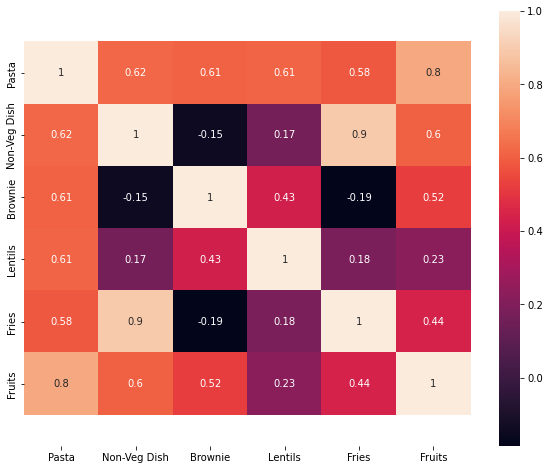

In [ ]:
plt.figure(figsize = (10,8) )
ax = sns.heatmap(data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Question-2: What patterns do you observe here? What insights can you draw from the exploratory data analysis so far?

### As per the correlation matrix above, it can be seen that Brownie and Fries has negative correlation, also Brownie is negatively correlated with the non veg dishes. Pasta has strong correlation with fruits and then with non veg dishes. Fruits are positively correlated with all dishes and has most correlation with Pastas and then non veg dishes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_copy = data[:]
scaler = MinMaxScaler()
data_copy[data_copy.columns] = scaler.fit_transform(data_copy)

## Question-3: What did we do here? Why did we do it?

### Min max scaler function is used by scaling each feature to a given range.The estimator scales and translates each feature individually such that it is in given range of training set e.g (between zero to one).Normalization and standardization of data is needed to perform clustering analysis and application of other algorithms.

### `Hopkins Statistic`

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def my_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
my_hopkins(data_copy)

0.8411855493156494

## Question-4: According to Hopkins Statistic is there cluster tendency in the data?

### As per Hopkins statistic above, we use 0.5 as threshold to reject alternative hypothesis.That if H < 0.5 then it is unlikely that data has statistically significant clusters. if value of H is > 0.5 or closer to 1 then that means we can reject null hypothesis and conclude that dataset is significantly clusterable data. In our case since the value of H is greater than 0.5 hence we can conclude that data has cluster tendency.

## Model building - KMeans

In [ ]:
from sklearn.cluster import KMeans

### Choosing K by comparing Cost against each K¶

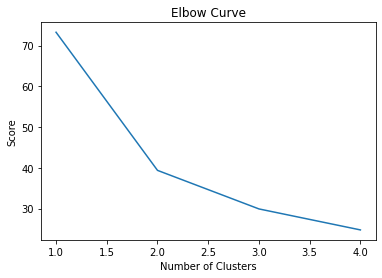

In [ ]:
import pylab as pl
number_of_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(data_copy).score(data_copy) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## According to the Elbow Curve the optimum No of Clusters is 2. But, your management plans 3 different types of food items to give to the employees. Hence we will be running K-Means with number of clusters as 3

## Question-5: Write the code for creating the KMeans clusters with number of clusters = 3.

### Hint: Use the function KMeans(n_clusters= no. of clusters ,max_iter=1000,random_state=42)

In [ ]:
km = KMeans(n_clusters = 3 ,max_iter=1000,random_state=42)
fitClusters = km.fit_predict(data_copy)

### Combining the predicted clusters with the original DF.¶

In [ ]:
copy_2 = data_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters)
data['k_mean_pred'] = fitClusters
clustersDf.columns = ['k_mean_pred']
combinedDf = pd.concat([copy_2, clustersDf], axis = 1)
combinedDf.set_index('Emp Id',inplace = True)
combinedDf.head()

,Pasta,Non-Veg Dish,Brownie,Lentils,Fries,Fruits,k_mean_pred
Emp Id,,,,,,,
Emp_1,0.0,0.176471,0.101504,0.064935,0.098361,0.216561,2
Emp_2,0.0,0.078431,0.090226,0.110390,0.103825,0.044586,2
Emp_3,0.0,0.000000,0.169173,0.181818,0.000000,0.089172,2
Emp_4,0.0,0.117647,0.093985,0.233766,0.142077,0.000000,2
Emp_5,0.0,0.313725,0.007519,0.000000,0.245902,0.159236,2


## Analysing the segments based on the clusters created by K-means clustering Model

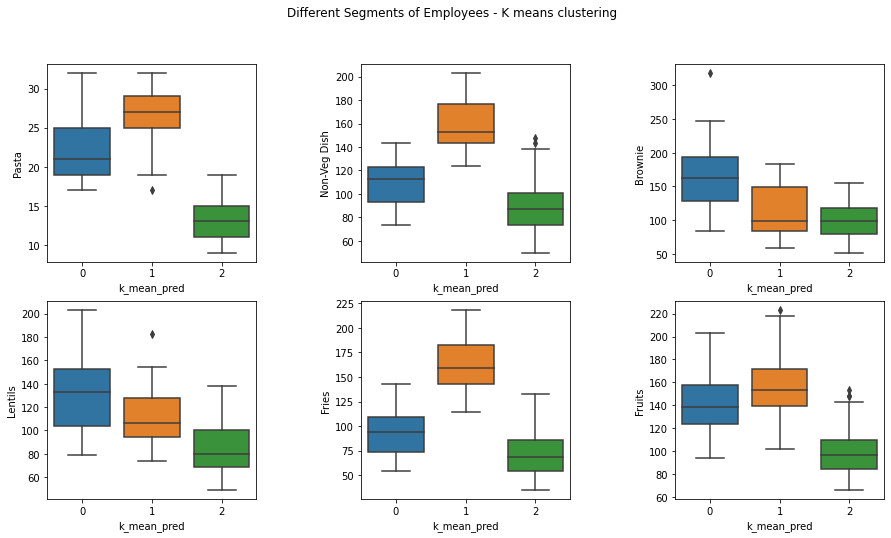

In [ ]:
temp = ['K means clustering']
a = 0
for x in  ['k_mean_pred']:
    plt.figure(figsize = (15,8))
    c = 1
    for variables in  data.columns[:-1]:
        plt.subplot(2,3,c)
        sns.boxplot(x= x, y= variables , data= data)
        c +=1

        plt.subplots_adjust(wspace=0.50)
    plt.suptitle('Different Segments of Employees - ' + temp[a])
    a +=1

## Now that the segments have been created, we need to profile each segment for reporting

## Question-6: What are the major differences between Employee Segment 0 and Employee Segment 1?

### Segment 0 prefers Lentils and brownie more, whereas Segment 1 prefers Pasta, Non veg,fries and fruits more then Segment 0.

## Question-7: Which of the employee segments does not show much interest in any kind of food item?

### Segment 2 does not show much interest in any kind of food since Segment 2 has the lowest rating for any kind of food choices.

